## Align the reads to the human genome
#### 1. Mapping reads from the sequencing to the human genome  
    Command: bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S ~/computational_biology_BioE131/lab6/output.sam --un ~/computational_biology_BioE131/lab6/unaligned.fastq
    Database: /data/hg19/hg19    
    Input read: /data/lab6/illumina_reads.fastq  
    Output message: 124714 reads; of these:
                    1124714 (100.00%) were unpaired; of these:
                    1028379 (91.43%) aligned 0 times
                    87274 (7.76%) aligned exactly 1 time
                    9061 (0.81%) aligned >1 times
                    8.57% overall alignment rate
    unaligned.fastq: Contains reads that did not align to the human genome  

_What percentage of your sequencing library came from contaminating human DNA?_   
    8.57% of the reads aligned to the human genome so 8.57% of the sequencing library came from contaminating human DNA.
                    



## Align the reads to the S. oneidensis reference genome
#### 2. Determining how well  the bacterium was sequenced  
    Command: bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U ~/computational_biology_BioE131/lab6/unaligned.fastq -S ~/computational_biology_BioE131/lab6/output2 --un ~/computational_biology_BioE131/lab6/unaligned2.fastq
    Database: /data/lab6/shewanella_oneidensis_mr-1    
    Input read: ~/computational_biology_BioE131/lab6/unaligned.fastq  
    unaligned.fastq: Contains reads that did not align to the Shewanella oneidensis reference genome
    Output message: 1028379 reads; of these:
                    1028379 (100.00%) were unpaired; of these:
                    299560 (29.13%) aligned 0 times
                    687571 (66.86%) aligned exactly 1 time
                    41248 (4.01%) aligned >1 times
                    70.87% overall alignment rate
    unaligned.fastq: Contains reads that did not align to the Shewanella oneidensis reference genome                  
                    
_What percentage of your filtered library didn’t align to the reference genome?_  
29.13% of the reads aligned 0 times


## Generate a coverage plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# the first column is the name of the reference sequence
# the second column is the base index within the reference
# the third column is the depth of coverage for that base
sorted_depth = 'output2.sorted.tab'
data = pd.read_table(sorted_depth)
data.head(20)

####  3. Generate a scatter plot of position in the genome vs. depth of coverage

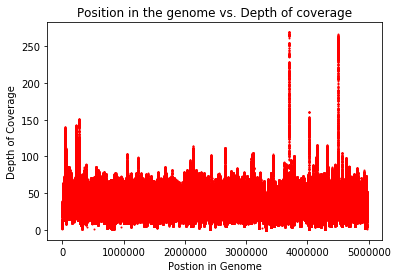

In [6]:
plt.title("Position in the genome vs. Depth of coverage")

plt.ylabel('Depth of Coverage')
plt.xlabel('Postion in Genome')
plt.scatter(x = data['1'], y = data['0'], s = 1, color = 'red')
plt.show()

#### 4. Generate a coverage histogram to see the distribution of coverage depth

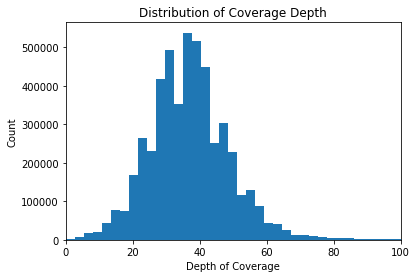

In [5]:
plt.title("Distribution of Coverage Depth")
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.xlim(0, 100)
plt.hist(data['0'], bins=100)
plt.show()

#### _What is the min, max, and mean coverage across all positions?_

In [58]:
print("The minimum coverage across all positions is", min(data['0']))
print("The maximum coverage across all positions is", max(data['0']))
print("The average coverage across all positions is", np.average(data['0']))

The minimum coverage across all positions is 0
The maximum coverage across all positions is 269
The average coverage across all positions is 36.95565222815359


## Extra Credit 1:
Generate the same two plots using the SAM file you produced aligning the reads to the human reference genome. Instead of using “Position in Genome” (the plot on the left in red, above), plot the average depth (total depth / length of chromosome) for each human chromosome: chr1-22, X, and Y.

_What biological sex is Jamie?_ Male

In [56]:
chromX = pd.read_table('jamie/chromos/chrX.tab')
chromoX_length = chromX.T.size
totaldepth = 0
for depth in chromX['1']:
    totaldepth += depth
    
averagedepth = totaldepth/chromoX_length
print(averagedepth)

0.3333236106700926


### Aligning the reads to the human reference genome:
Command: bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S ~/computational_biology_BioE131/lab6/jamie.sam --un ~/computational_biology_BioE131/lab6/unaligned.fastq

### After sorting and indexing jamie.bam file
for run in {1..22}; do samtools depth -r chr$run jamie.sorted.bam > chr$run.tab; done

### Create all the chromosome tables

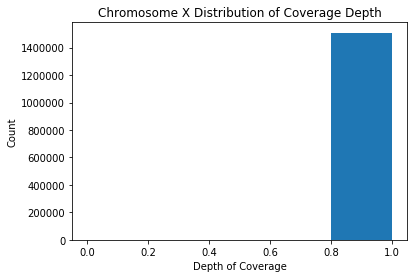

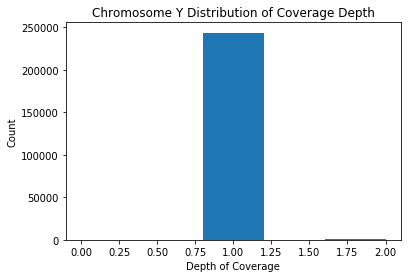

In [30]:
# the first column is the name of the reference sequence
# the second column is the base index within the reference
# the third column is the depth of coverage for that base

chromX = pd.read_table('jamie/chromos/chrX.tab')
chromX.head(2000)
chromY = pd.read_table('jamie/chromos/chrY.tab')

plt.title("Chromosome X Distribution of Coverage Depth")
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')

plt.hist(chromX['1'], bins=5)
plt.show()

plt.title("Chromosome Y Distribution of Coverage Depth")
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')

plt.hist(chromY['1'], bins=5)
plt.show()


jamie/chromos/chr1.tab


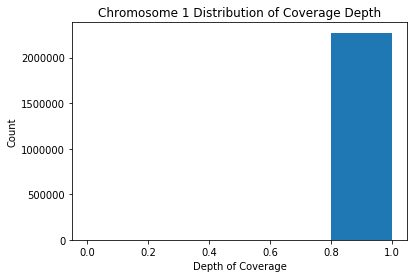

jamie/chromos/chr2.tab


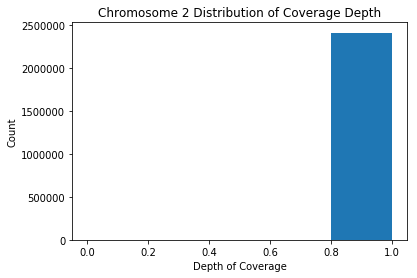

jamie/chromos/chr3.tab


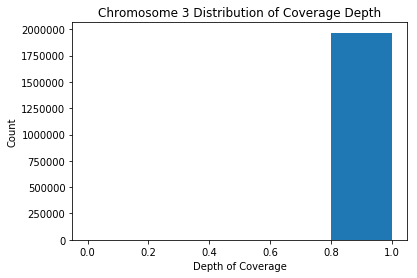

jamie/chromos/chr4.tab


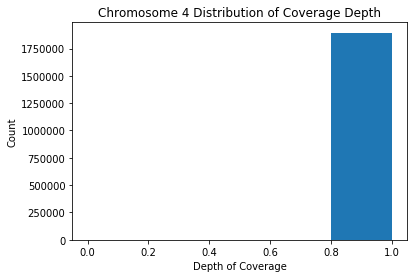

jamie/chromos/chr5.tab


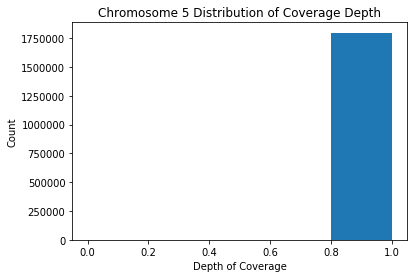

jamie/chromos/chr6.tab


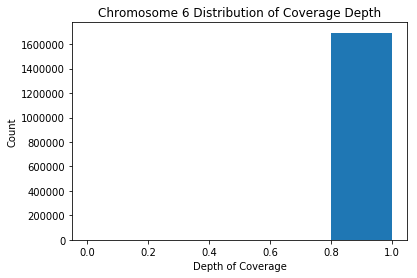

jamie/chromos/chr7.tab


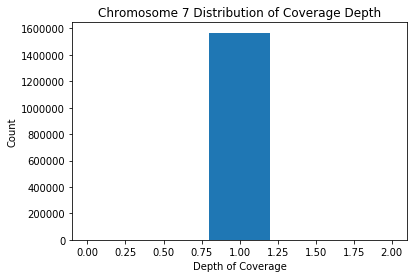

jamie/chromos/chr8.tab


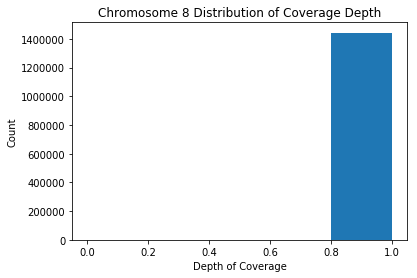

jamie/chromos/chr9.tab


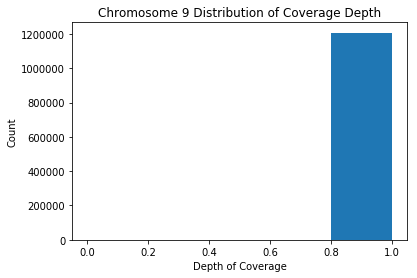

jamie/chromos/chr10.tab


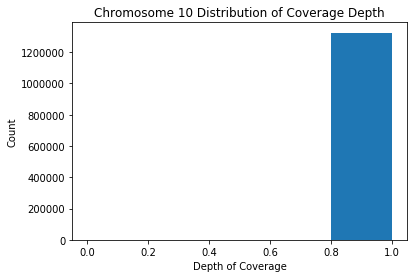

jamie/chromos/chr11.tab


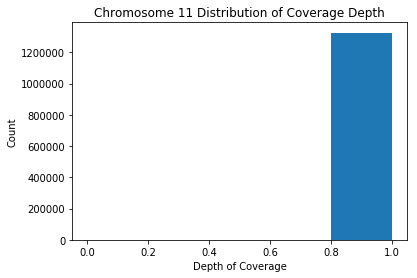

jamie/chromos/chr12.tab


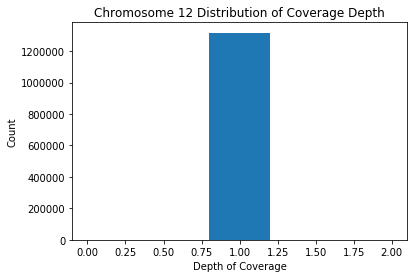

jamie/chromos/chr13.tab


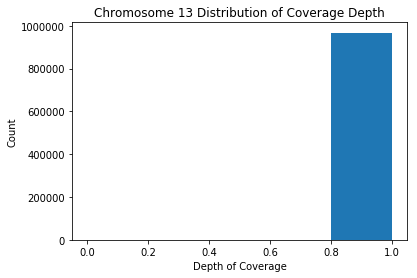

jamie/chromos/chr14.tab


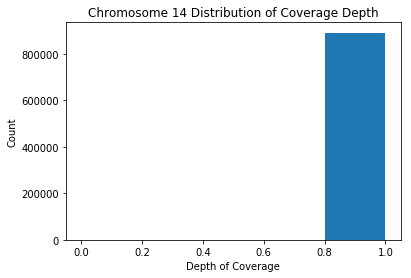

jamie/chromos/chr15.tab


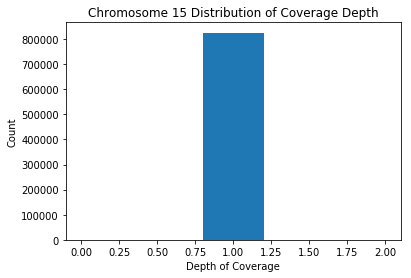

jamie/chromos/chr16.tab


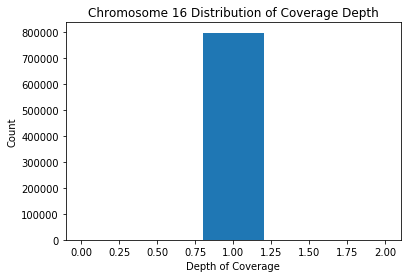

jamie/chromos/chr17.tab


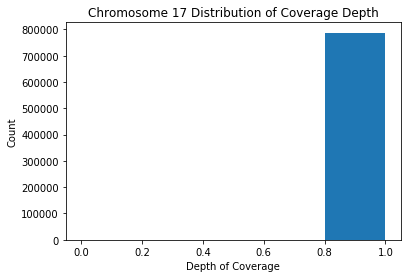

jamie/chromos/chr18.tab


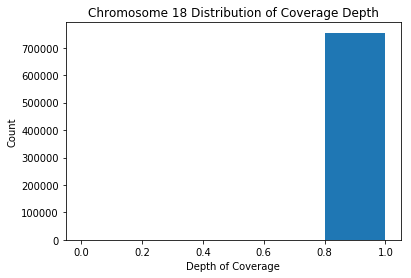

jamie/chromos/chr19.tab


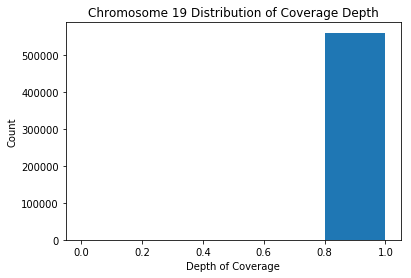

jamie/chromos/chr20.tab


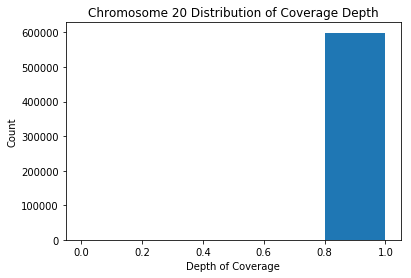

jamie/chromos/chr21.tab


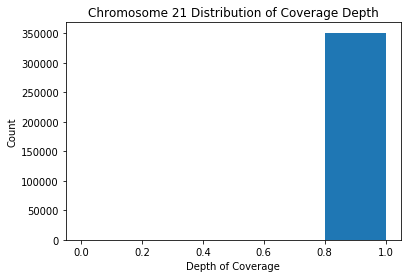

jamie/chromos/chr22.tab


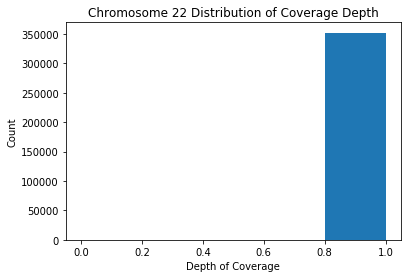

jamie/chromos/chrX.tab


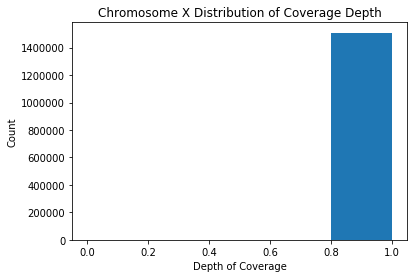

jamie/chromos/chrY.tab


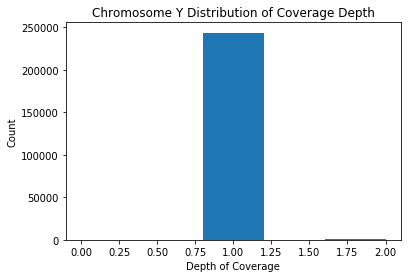

In [4]:
# the first column is the name of the reference sequence
# the second column is the base index within the reference
# the third column is the depth of coverage for that base

averagedepth = []
names = []

i=1
while i <= 24:
    inum = str(i);
    if(i == 23):
        inum = "X"
    if(i==24):
        inum ="Y"
    chrnum = "jamie/chromos/chr" + inum + ".tab";
    print(chrnum)
    chromo = pd.read_table(chrnum)
    plt.title("Chromosome " + inum + " Distribution of Coverage Depth")
    plt.xlabel('Depth of Coverage')
    plt.ylabel('Count')
    plt.hist(chromo['1'], bins=5)
    plt.show()
    
    totaldepth = 0
    for depth in chromo['1']:
        totaldepth += depth
    averagedepth.append(totaldepth/chromo.T.size)
    names.append(inum)
    i+=1
    



### Plot the average depth (total depth / length of chromosome) for each human chromosome: chr1-22, X, and Y

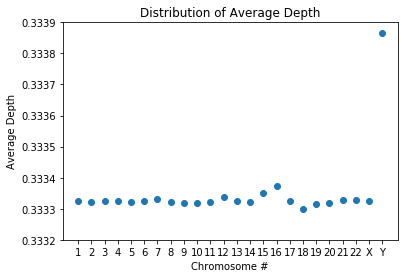

(array([23.,  0.,  1.]),
 array([0.33330066, 0.33348908, 0.33367749, 0.33386591]),
 <a list of 3 Patch objects>)

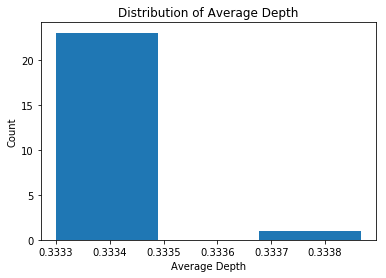

In [7]:
plt.title("Distribution of Average Depth")
plt.xlabel('Chromosome #')
plt.ylabel('Average Depth')
plt.yticks(np.arange(0.3332, 0.334, 0.0001))
plt.ylim([0.3332,0.3339])
plt.scatter(names,averagedepth)
plt.show()

plt.title("Distribution of Average Depth")
plt.xlabel('Average Depth')
plt.ylabel('Count')
plt.hist(averagedepth, bins=3)

# This DNA belongs to a male, as there are significantly more reads and depth coverage for the Y chromosome, which cannot belong to a female.

## Extra Credit 2:
Try to “zoom in” on regions that seem to have higher coverage than average. You’ll have to extract the sequence from those regions and BLAST it.

_Can you figure out what genes are in those regions?_

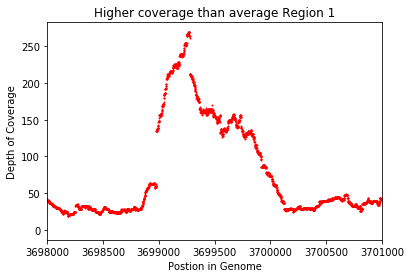

In [18]:
plt.title("Higher coverage than average Region 1")

plt.ylabel('Depth of Coverage')
plt.xlabel('Postion in Genome')
plt.xlim(3.698e6, 3.701e6)
plt.scatter(x = data['1'], y = data['0'], s = 1, color = 'red')
plt.show()

**tnpa gene:** https://www.ncbi.nlm.nih.gov/nuccore/AE014299.2?from=3698990&to=3700030&report=gbwithparts  
> AE014299.2:3698990-3700030 Shewanella oneidensis MR-1, complete genome
ATGCTCCATAGTAACAATCCAATCATCAAACACAAAACAGGTTTACTCAATCTGGCAGAGGAACTGAGCA
ACGTCTCCAGAGCCTGCAAAGTCATGGGTGTGTCTCGTGATACGTTTTATCGTTACCGCGAGTTAGTGGA
CGATGGCGGTGTTGATGCACTGATCGAAAAAAGTCGTAGAAGTCCAAATCTCAAGAACCGTGTCGAAGAA
GCTGTTGAACAGGCAGTGATGGAGTATGCGATTGAATTTCCCGCCCATGGCCAACACAGAACCAGCAATG
AACTGCGCAAAAAAGGCGTGTTTGTTTCTGGCAGTGGTGTCCGCTCAATCTGGTTGCGACATGATTTAGA
GAACTTTAAGAAGCGACTGAAAGCCTTGGAAGCCAAAGTAGCTCGCGATGGCATTCAACTTACTGATGAA
CAGATTGCGGCACTTGAGCGCAAAAAACACGACGATGAAGCCTGTGGTGAGATTGAAACCGCGCACCCAG
GCTACCTTGGGTCGCAAGACACGTTTTATGTCGGAAACCTCAAGGGCGTTGGTCGTATCTATCAGCAAAC
CTATGTCGATACGTACTGCAAAGTCGCTCATTGCAAGCTCTATACTACGAAAACACCTATCACTGCAGCG
GACTTATTGAACGACAAAGTATTGCCGTTTTACGAGTCACAGCAGTTGCCGGTGCTGCGTATTTTAACTG
ACCGTGGCACAGAGTATTGCGGCAAGGTCGAGCACCATGATTACCAGCTATATCTGGCGATTAATGATAT
CGACCACACGAAAACCAAAGCGATGTCGCCGCAAACGAATGGGATCTGCGAGCGGTTTCATAAGACGATC
CTGAACGAGTTTTATCAGGTGACCTTCCGCAAAAAGCTGTACCAAACGCTGGAGGAGCTGCAAAAAGATC
TGGACGAGTGGCTGTCTTACTACAACAATGAACGCACTCATCAAGGCAAAATGTGCAACGGCAGAACGCC
AGTTGAAACATTGATTGATGGGAAACGGGTTTGGGCGGAAAAGAATCTGACTCGAATCTAA

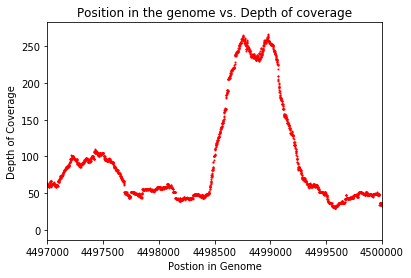

In [10]:
plt.title("Position in the genome vs. Depth of coverage")

plt.ylabel('Depth of Coverage')
plt.xlabel('Postion in Genome')
plt.xlim(4.497e6, 4.5e6)
plt.scatter(x = data['1'], y = data['0'], s = 1, color = 'red')
plt.show()


**cyaA gene**  
complement(4488018..4490432)
                     /gene="cyaA"
                     /locus_tag="SO_4312"
                     /EC_number="4.6.1.1"
                     /codon_start=1
                     /transl_table=11
                     /product="adenylate cyclase CyaA"
                     /protein_id="AAN57281.1"
                     /translation="MDQQGHFPDIAERLNQVRIARALALLSPLQKHLFRLIPFLIQQN
                     SVQYPGFVDPNTPCGIYGYKAGSLEAQACDVFKLPFIATEVDFYAFEGVYAMGSTASF
                     GQNAKSDVDVWLVHHADLCDDDLALIKLKTERLTAWFAEYQFEVNFYLVHPLQFCGDM
                     SQRTVCQSSMAHEHSGSTQHWLLLEEFYRSQIRLAGKIIAWWPDAKLNPELLSLGNVH
                     ELPASEYFGASLWQLYKGLNKPHKALIKVLLLEAYASEYPHSQLLCDRLWQKTLAGDF
                     STANDAYYAIYEVIEAYLLKQNDSRRLEIVRRCFYLKCGVFLSLSNQGKDWRYAKMQK
                     LVQEWQWPNSLITTLDDCEHWHSGQLNWFNEQLNELLLASYQTLLRFASTHELNEGLK
                     IEELGMLTRKLHTYFSQDEDQIAKLNLLWSRSVAEAEVTMVSSTKENQYYLYRQGPKP
                     LNLLGDSAICKGKSPSALMIWACLNGVSTPETKWYEFGQSKVKSQRLTDASKRLLNFI
                     DHDWRVSKLDLCQPWHFRKLIFILNLDCDPTIGWRGQEMMVDVMNANVFSLGRKQENM
                     LGALDAICLNSWGEWQCHRFEGETAVLQALAFVTPGLRRATHPVDMDVISCSQRLRPQ
                     LKLAVKNLLKQTVRLCQQVQQSSTLVQPLQISHTRYGIFFNPLGMAYQDLSDAKSFYQ
                     QLARSHLVQLPRPELGDDPFSSMPNIIQNFAAKGAIQYFLRQRTDSLDVFILDEENQL
                     SHYVQSGSDMSELVNKVSHHYVFDEFYASKARFNIPQFFHLVRVAGELTVRPFGVDMN
                     NANVEF"
                     
**hemC gene**                     
4490634..4491566
                     /gene="hemC"
                     /locus_tag="SO_4313"
     CDS             4490634..4491566
                     /gene="hemC"
                     /locus_tag="SO_4313"
                     /EC_number="2.5.1.61"
                     /codon_start=1
                     /transl_table=11
                     /product="hydroxymethylbilane synthase HemC"
                     /protein_id="AAN57282.1"
                     /translation="MSENRIRIATRKSPLAMWQAEFVKAELERIHPGIVVELLPMSTK
                     GDVILDTPLAKVGGKGLFVKELEVAMLEDQADIAVHSMKDVPVDFPEGLGLEVICERE
                     DPRDAFVSNIYKSISELPLGATVGTSSLRRQCQLRASRPDLIIKDLRGNVGTRLAKLD
                     NGEYDAIILAAAGLIRLKLSERIASFISAEESLPANGQGAVGIECRTNDERVKALLAP
                     LEHLETRYRVIAERAMNTRLEGGCQVPIGAFAEIDGDEMTLRGLVGNPDGSEIIEGVI
                     TGPKTEATQLGVALAEELLSKGAKSILDAVYAKA"
                     
**hemD gene** 
4491571..4492311
/gene="hemD"
/locus_tag="SO_4314"
/EC_number="4.2.1.75"
/codon_start=1
/transl_table=11
/product="uroporphyrinogen-III synthase HemD"
/protein_id="AAN57283.1"
/translation="MKVLLTRPEGRNQSMVDALNERGIEHCVTPLLCVEATPALPPET
SHPLANVDMVVCISANAVSFADDTFKANDANVKGWPKVPYFAVGHATWEALQQIDIDA
LEAPDDCQQTEGLLTLPTLQHIQGKKITIIRGVGGREALAEQLTSRGAQVRYWEVYQR
ACPPLDGTIITQQWIDLGIDTVVVTSGEVLDNLINLVPKELFAWLRSCHIIVPSNRVE
AQAHAFGITQVTNANAANSKAVLNALKL"